This file was used to generate the results for all embeddings, weights and baselines for the given dataset.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.manifold import TSNE

import networkx as nx
from interactive_layout import InteractiveLayout, get_crossings, get_occlusions

In [2]:
edges=pd.read_csv('./Data/facebook/698.edges', sep=" ", header=None, names=["source", "target"])
edges["weight"] = 1
nodes=pd.read_csv('./Data/facebook/698.feat', sep=" ", header=None)
nodes = nodes.rename(columns={0: "id"})

graph=nx.from_pandas_edgelist(edges, 'source', 'target', 'weight')

nodes = nodes.loc[nodes['id'].isin(list(graph.nodes))]
nr_nodes = len(graph.nodes)
nr_edges = len(graph.edges)

# TSNE

In [3]:
tsne_layout = InteractiveLayout(nodes = nodes, edges = edges, method="TSNE")

In [6]:
tsne_layout.draw()

interactive(children=(IntSlider(value=50, description='x', max=99), Output()), _dom_classes=('widget-interact'…

<function interactive_layout.InteractiveLayout.draw.<locals>.f(x)>

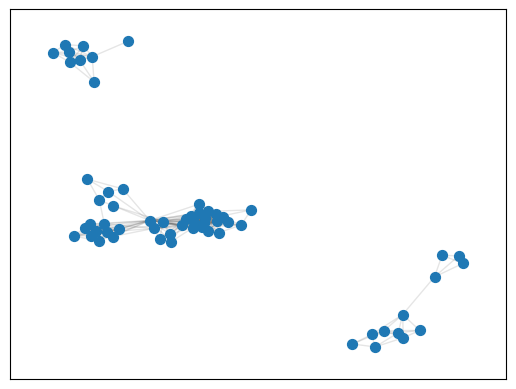

In [10]:
w=70
nx.draw_networkx_nodes(tsne_layout.graph, pos=tsne_layout.positions[w], node_size=50)
nx.draw_networkx_edges(tsne_layout.graph, pos=tsne_layout.positions[w], alpha=0.1)
plt.savefig('./imgs/results/facebook/tsne{}_1579_68.jpg'.format(w))

# UMAP

In [4]:
umap_layout = InteractiveLayout(nodes = nodes, edges = edges, method="UMAP")

In [11]:
umap_layout.draw()

interactive(children=(IntSlider(value=50, description='x', max=99), Output()), _dom_classes=('widget-interact'…

<function interactive_layout.InteractiveLayout.draw.<locals>.f(x)>

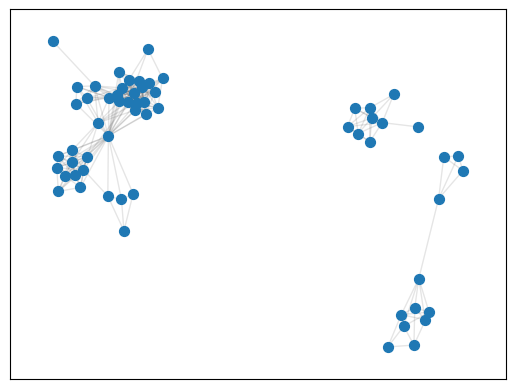

In [16]:
w=70
nx.draw_networkx_nodes(umap_layout.graph, pos=umap_layout.positions[w], node_size=50)
nx.draw_networkx_edges(umap_layout.graph, pos=umap_layout.positions[w], alpha=0.1)
plt.savefig('./imgs/results/facebook/umap{}_1589_30.jpg'.format(w))

# node2vec

In [5]:
node2vec_layout = InteractiveLayout(nodes = nodes, edges = edges, method="node2vec")

Computing transition probabilities:   0%|          | 0/155 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 150/150 [00:13<00:00, 11.29it/s]


In [17]:
node2vec_layout.draw()

interactive(children=(IntSlider(value=50, description='x', max=99), Output()), _dom_classes=('widget-interact'…

<function interactive_layout.InteractiveLayout.draw.<locals>.f(x)>

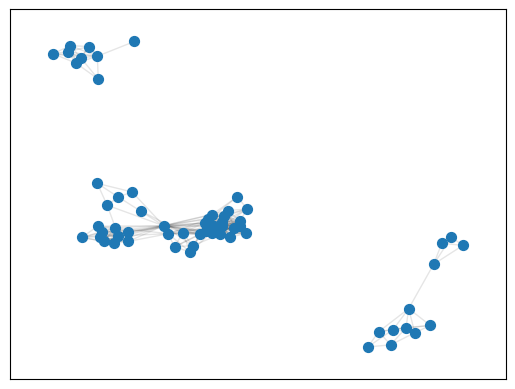

In [21]:
w=70
nx.draw_networkx_nodes(node2vec_layout.graph, pos=node2vec_layout.positions[w], node_size=50)
nx.draw_networkx_edges(node2vec_layout.graph, pos=node2vec_layout.positions[w], alpha=0.1)
plt.savefig('./imgs/results/facebook/node2vec{}_1484_66.jpg'.format(w))

# Baseline FR

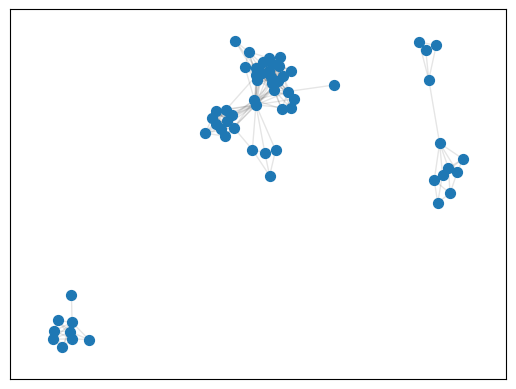

In [23]:
#labels = dict(zip(nodes.id, nodes.label))
G = nx.from_pandas_edgelist(edges, 'source', 'target', 'weight')
np.random.seed(4040)
fr_pos=nx.fruchterman_reingold_layout(G)
nx.draw_networkx_nodes(G, pos=fr_pos, node_size=50)
nx.draw_networkx_edges(G, pos=fr_pos, alpha=0.1)
plt.savefig('./imgs/results/facebook/baseline_fr.jpg')

In [54]:
edge_list = list(G.edges)
get_crossings(fr_pos, nr_edges, edge_list)

1351

In [55]:
get_occlusions(fr_pos, nr_nodes)

44

# Force then embed

In [57]:
np.random.seed(4040)
embeddings = TSNE(n_components=2, init=np.array(list(fr_pos.values()))).fit_transform(nodes.drop('id', axis=1))

embedding_pos = {}
for i, name in enumerate(nodes['id']):
    embedding_pos[name] = embeddings[i]

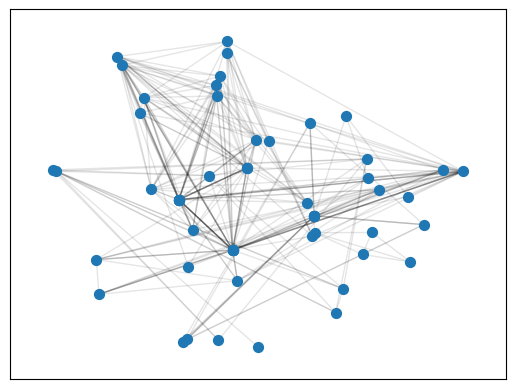

In [58]:
nx.draw_networkx_nodes(G, pos=embedding_pos, node_size=50)
nx.draw_networkx_edges(G, pos=embedding_pos, alpha=0.1)
plt.savefig('./imgs/results/facebook/baseline_fr_embed.jpg')

In [59]:
get_crossings(embedding_pos, nr_edges, edge_list)

5145

In [60]:
get_occlusions(embedding_pos, nr_nodes)

43

# Embed then force

In [61]:
np.random.seed(4040)
embeddings = TSNE(n_components=2).fit_transform(nodes.drop('id', axis=1))

embedding_pos = {}
for i, name in enumerate(nodes['id']):
    embedding_pos[name] = embeddings[i]

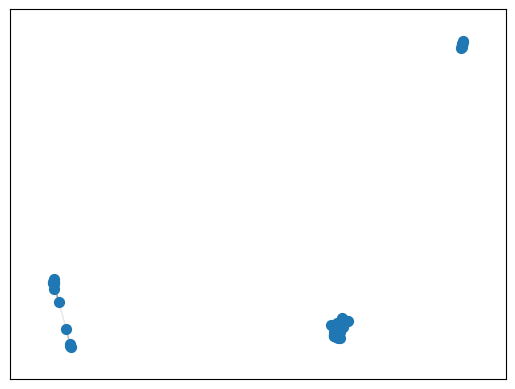

In [63]:
np.random.seed(4040)
pos=nx.fruchterman_reingold_layout(G, pos=embedding_pos, iterations = 50)
nx.draw_networkx_nodes(G, pos=pos, node_size=50)
nx.draw_networkx_edges(G, pos=pos, alpha=0.1)
plt.savefig('./imgs/results/facebook/baseline_embed_fr.jpg')

In [64]:
get_crossings(pos, nr_edges, edge_list)

2597

In [65]:
get_occlusions(pos, nr_nodes)

777